In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [15]:
base = pd.read_csv("MICRODADOS_ENEM_ESCOLA.csv",delimiter=',',encoding="utf-8")

/etc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,9,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
base.tail()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA,Unnamed: 27,Unnamed: 28,Unnamed: 29
172300,2013,53,DF,5300108,Bras�lia,53068181,CED 310 DE SANTA MARIA,2,1,213,...,NaN,91.8,NaN,83.1,9.1,7.8,Maior que 90 alunos,NaN,NaN,NaN
172301,2014,53,DF,5300108,Bras�lia,53068181,CED 310 DE SANTA MARIA,2,1,138,...,NaN,72.0,82.00,81.2,17.5,1.3,Maior que 90 alunos,NaN,NaN,NaN
172302,2015,53,DF,5300108,Bras�lia,53068181,CED 310 DE SANTA MARIA,2,1,198,...,Grupo 3,83.3,76.32,78.9,10.1,11.0,Maior que 90 alunos,NaN,NaN,NaN
172303,2014,53,DF,5300108,Bras�lia,53082001,COL IMPACTO,4,1,12,...,NaN,69.2,NaN,91.4,8.6,0.0,De 1 a 30 alunos,NaN,NaN,NaN
172304,2015,53,DF,5300108,Bras�lia,53082001,COL IMPACTO,4,1,28,...,Grupo 5,57.1,75.00,95.0,5.0,0.0,De 1 a 30 alunos,NaN,NaN,NaN


In [17]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172305 entries, 0 to 172304
Data columns (total 30 columns):
NU_ANO                       172305 non-null int64
CO_UF_ESCOLA                 172305 non-null int64
SG_UF_ESCOLA                 172305 non-null object
CO_MUNICIPIO_ESCOLA          172305 non-null int64
NO_MUNICIPIO_ESCOLA          172305 non-null object
CO_ESCOLA_EDUCACENSO         172305 non-null int64
NO_ESCOLA_EDUCACENSO         172305 non-null object
TP_DEPENDENCIA_ADM_ESCOLA    172302 non-null object
TP_LOCALIZACAO_ESCOLA        172305 non-null object
NU_MATRICULAS                172305 non-null object
NU_PARTICIPANTES_NEC_ESP     48226 non-null float64
NU_PARTICIPANTES             169454 non-null float64
NU_TAXA_PARTICIPACAO         107539 non-null float64
NU_MEDIA_CN                  104706 non-null float64
NU_MEDIA_CH                  104688 non-null float64
NU_MEDIA_LP                  104687 non-null float64
NU_MEDIA_MT                  104687 non-null float64
NU_

In [18]:
for c in base.columns:
    if c[:2] == 'CO' or c[:2] == 'Un':
        base.drop(c,axis=1,inplace=True)

In [19]:
base.columns = ['Ano','UF','Municipio','Escola','Dependencia_ADM','Localizacao','Matriculas','Participantes_PCD','Participantes','Taxa_Participacao','Media_Naturais','Media_Humanas','Media_Linguagens','Media_Matematica','Media_Redacao','Media_ProvaObjetiva','Media_Total','INSE','IAFD','Taxa_Permanencia','Taxa_Aprovacao','Taxa_Reprovacao','Taxa_Abandono','Porte']
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172305 entries, 0 to 172304
Data columns (total 24 columns):
Ano                    172305 non-null int64
UF                     172305 non-null object
Municipio              172305 non-null object
Escola                 172305 non-null object
Dependencia_ADM        172302 non-null object
Localizacao            172305 non-null object
Matriculas             172305 non-null object
Participantes_PCD      48226 non-null float64
Participantes          169454 non-null float64
Taxa_Participacao      107539 non-null float64
Media_Naturais         104706 non-null float64
Media_Humanas          104688 non-null float64
Media_Linguagens       104687 non-null float64
Media_Matematica       104687 non-null float64
Media_Redacao          123450 non-null float64
Media_ProvaObjetiva    19144 non-null float64
Media_Total            45605 non-null float64
INSE                   18447 non-null object
IAFD                   45339 non-null float64
Taxa_Perma

In [20]:
base.Participantes_PCD.fillna(0,inplace=True)
base.Participantes.fillna(0,inplace=True)

In [21]:
base.describe()

,Ano,Participantes_PCD,Participantes,Taxa_Participacao,Media_Naturais,Media_Humanas,Media_Linguagens,Media_Matematica,Media_Redacao,Media_ProvaObjetiva,Media_Total,IAFD,Taxa_Permanencia,Taxa_Aprovacao,Taxa_Reprovacao,Taxa_Abandono
count,172305.000000,172305.000000,172305.000000,107539.000000,104706.000000,104688.000000,104687.000000,104687.000000,123450.000000,19144.000000,45605.000000,45339.000000,30876.000000,153760.000000,155213.000000,155225.000000
mean,2009.805659,2.049691,54.296097,64.063865,531.668709,490.908473,509.955970,512.976072,479.773414,40.381016,47.081692,60.349215,77.009162,82.765425,10.536644,7.348968
std,3.154137,21.254974,56.520287,24.460217,55.625860,51.838448,48.105396,73.124845,194.619663,9.884216,8.836499,17.114111,37.248237,13.260439,10.577856,9.032516
min,2005.000000,0.000000,0.000000,2.000000,10.000000,20.000000,319.260000,357.980000,29.380000,17.310000,16.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,0.000000,20.000000,50.700000,492.390000,453.630000,475.640000,458.560000,462.640000,33.490000,40.740000,49.700000,69.680000,74.000000,3.700000,0.000000
50%,2010.000000,0.000000,36.000000,65.380000,527.775000,478.000000,504.870000,494.300000,540.250000,37.650000,45.570000,61.800000,80.530000,85.100000,8.000000,3.900000
75%,2013.000000,0.000000,68.000000,83.330000,567.930000,521.210000,542.930000,554.610000,598.500000,44.200000,51.960000,72.900000,88.890000,93.900000,14.400000,12.000000
max,2015.000000,1564.000000,1190.000000,864.000000,758.040000,755.160000,712.350000,873.650000,930.000000,82.960000,82.970000,100.000000,5822.000000,100.000000,100.000000,100.000000


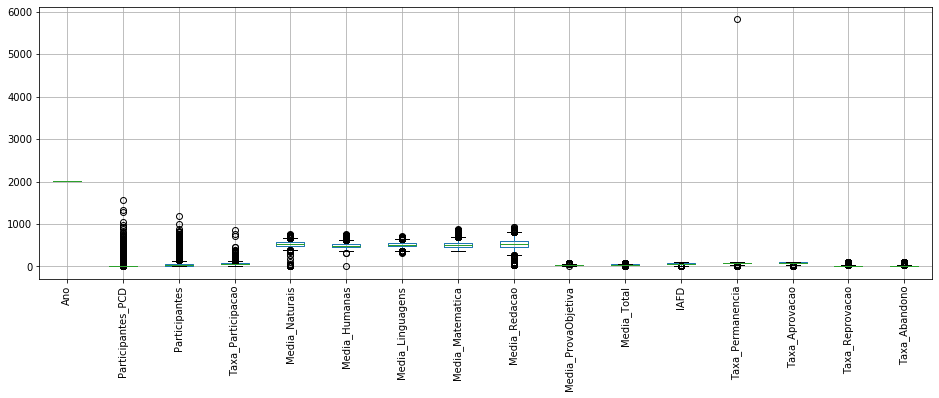

In [22]:
base.boxplot(rot=90,figsize=(16,5))

In [23]:
base[base.Taxa_Permanencia > 1000]

,Ano,UF,Municipio,Escola,Dependencia_ADM,Localizacao,Matriculas,Participantes_PCD,Participantes,Taxa_Participacao,...,Media_Redacao,Media_ProvaObjetiva,Media_Total,INSE,IAFD,Taxa_Permanencia,Taxa_Aprovacao,Taxa_Reprovacao,Taxa_Abandono,Porte
72217,2015,MG,Belo Horizonte,COLEGIO BERNOULLI - UNIDADE LOURDES,4,1,304,0.0,300.0,98.68,...,845.87,NaN,NaN,Grupo 6,70.1,5822.0,94.2,5.8,0.0,Maior que 90 alunos


In [24]:
base.drop([72217],inplace=True)

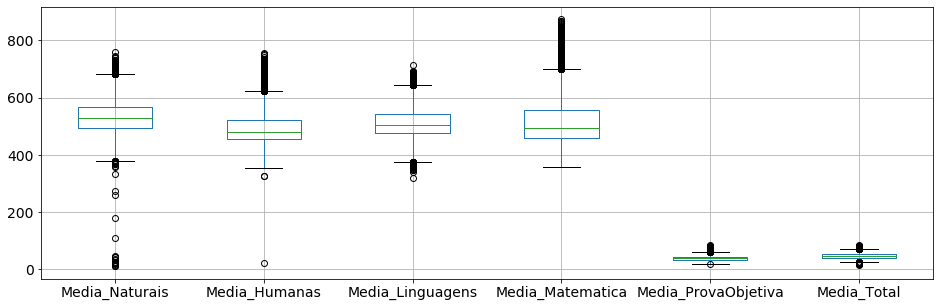

In [25]:
base[['Media_Naturais','Media_Humanas','Media_Linguagens', 'Media_Matematica',
      'Media_ProvaObjetiva','Media_Total']].boxplot(fontsize=14,figsize=(16,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0614eccd68>,
      dtype=object)

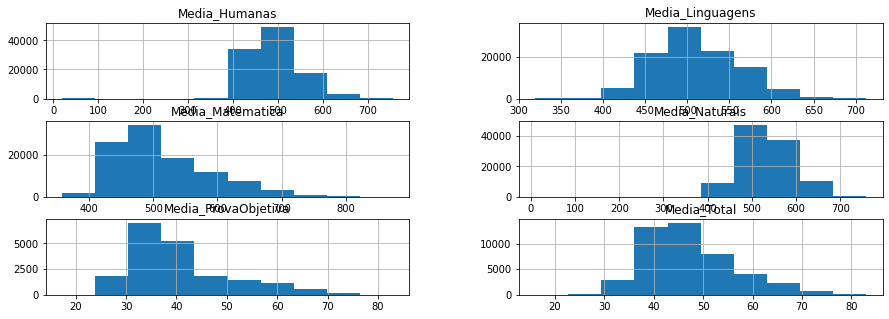

In [26]:
base[['Media_Naturais','Media_Humanas','Media_Linguagens', 'Media_Matematica',
      'Media_ProvaObjetiva','Media_Total']].hist(figsize=(15,5))

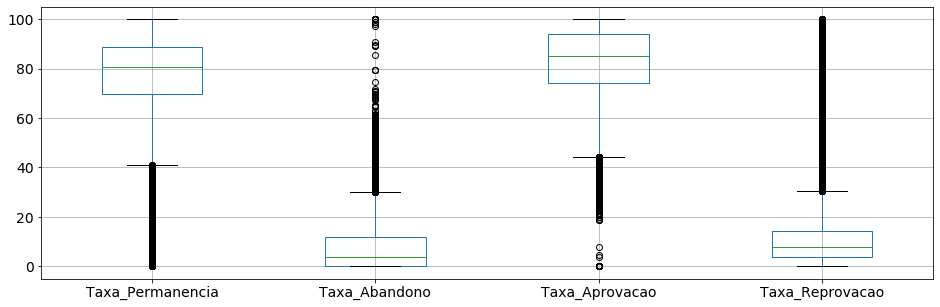

In [27]:
base[['Taxa_Permanencia','Taxa_Abandono','Taxa_Aprovacao','Taxa_Reprovacao']].boxplot(figsize=(16,5),fontsize=14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0614b96908>,
      dtype=object)

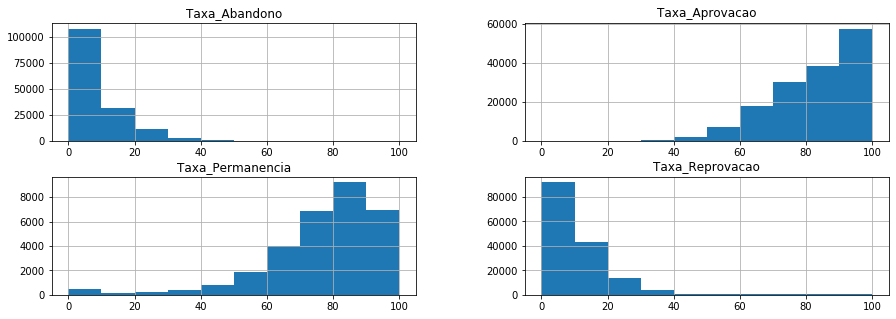

In [28]:
base[['Taxa_Permanencia','Taxa_Abandono','Taxa_Aprovacao','Taxa_Reprovacao']].hist(figsize=(15,5))

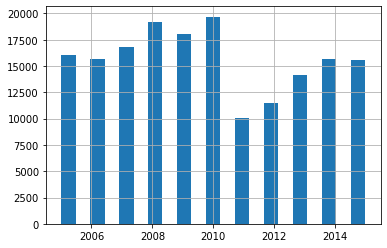

In [29]:
base.Ano.hist(bins=21)

In [75]:
def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def resolveTI(A,b): #A Triangular Inferior
    x = np.zeros(len(b))
    for i in range(len(b)):
        x[i] = (b[i] - (A[i][:i]*x[:i]).sum())/A[i][i] # x[<intervalo_fechado>:<intervalo_aberto>]
    return x

def decompoeLU(A):
    L = np.identity(len(A))
    U = A.copy()
    for i in range(len(A)-1):
        L[i+1:,i] = U[i+1:,i]/U[i][i]
        U[i+1:] -= L[i+1:,i].reshape((len(L[i+1:]),1))*U[i]
    return L,U 

def resolveLU(L,U,b):
    y = resolveTI(L,b)
    return resolveTS(U,y)

def verificaCholesky(A):
    return (A == A.T).all() and (A.diagonal() > 0).all() and (np.linalg.eig(A)[0] > 0).all() and verificaPivot(A)

def geraCholesky(A):
    L = np.zeros(A.shape)
    for j in range(len(A)):
        L[j][j] = np.sqrt(A[j][j] - (np.power(L[j][:j],2).sum()))
        for i in range(len(A)):
            L[i,j] = (A[i,j]- (L[i,:j]*L[j,:j]).sum())/L[j,j]
    j = len(A)-1
    L[j,j] = np.sqrt(A[j,j]-(L[j][:j]**2).sum())
    return L

def cholesky(A,b):
    L = geraCholesky(A)
    return resolveLU(L,L.T,b)

def regressaoLinear(x,y):
    A = np.zeros((2,2))
    b = np.zeros(2)
    A[0,0] = len(x)
    A[0,1] = A[1,0] = x.sum()
    A[1,1] = (x*x).sum()
    b[0] = y.sum()
    b[1] = (x*y).sum()
    return cholesky(A,b) # np.linalg.solve(A,b) - Eliminação Gaussiana no Numpy

def regressaoLinearMultipla(x,y): #x é uma matriz ao invés de vetor
    xs = np.vstack((np.ones(len(x[0])),x))
    ys = xs.dot(y)
    xs = xs.dot(xs.T)
    return cholesky(xs,ys)

def resolveLin(b,x):
    return b[0] + (b[1:]*x)

def resolveLinVet(b,x):
    return b[0] + (b[1:]*x).sum(axis=1)

def distanciaquad(y,ypred):
    return ((y-ypred)**2).sum()
    
def r2(y,ypred):
    return 1 - distanciaquad(y,ypred)/((y-y.mean())**2).sum()

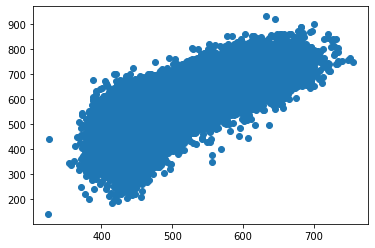

In [31]:
ordenado = base.sort_values(['Media_Humanas'])
plt.scatter(ordenado.Media_Humanas,ordenado.Media_Redacao)

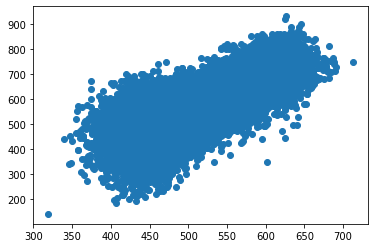

In [32]:
plt.scatter(base.Media_Linguagens,base.Media_Redacao)

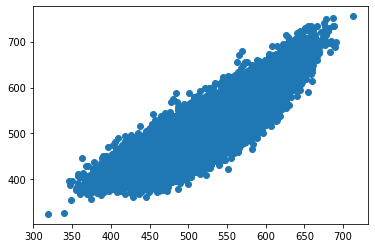

In [33]:
plt.scatter(base.Media_Linguagens,base.Media_Humanas)

In [45]:
base_municipio = base.groupby('UF')
base_municipio.max()

,Ano,Municipio,Escola,Participantes_PCD,Participantes,Taxa_Participacao,Media_Naturais,Media_Humanas,Media_Linguagens,Media_Matematica,Media_Redacao,Media_ProvaObjetiva,Media_Total,IAFD,Taxa_Permanencia,Taxa_Aprovacao,Taxa_Reprovacao,Taxa_Abandono
UF,,,,,,,,,,,,,,,,,,
AC,2015,Xapuri,INSTITUTO FEDERAL DO ACRE CAMPUS XAPURI,12.0,496.0,100.0,642.64,603.15,600.62,658.66,723.08,57.24,68.44,100.0,100.0,100.0,48.4,43.1
AL,2015,�gua Branca,UNIDADE INTEGRADA SESI SENAI EBEP PROF WILTON ...,8.0,379.0,100.0,656.90,637.62,622.04,696.31,740.84,71.69,77.34,100.0,100.0,100.0,47.3,100.0
AM,2015,Urucurituba,UNIDADE DE ENS. DESC. DE MANAUS,8.0,756.0,100.0,683.99,670.38,629.25,748.04,781.11,66.11,73.26,100.0,100.0,100.0,75.9,100.0
AP,2015,Vit�ria do Jari,NUCLEO DE EDUCACAO INTEGRADA - NEI,13.0,515.0,100.0,640.42,610.42,604.05,625.98,705.27,53.70,68.19,100.0,100.0,100.0,57.1,64.3
BA,2015,�rico Cardoso,VILA DA VITORIA EMPREENDIMENTOS EDUCACIONAIS,29.0,646.0,100.0,713.73,705.88,674.42,782.63,835.25,75.64,80.32,100.0,100.0,100.0,100.0,100.0
CE,2015,V�rzea Alegre,Z�LIA DE MATOS BRITO ESCOLA DE ENSINO FUNDAMEN...,974.0,654.0,451.0,718.63,734.82,663.71,858.40,887.27,74.26,72.41,97.7,100.0,100.0,100.0,79.6
DF,2015,Bras�lia,MONT BLANC INST DE ENSINO,23.0,605.0,100.0,708.72,707.32,657.07,793.46,848.77,74.54,76.29,100.0,100.0,100.0,55.1,46.2
ES,2015,�guia Branca,UP CENTRO EDUCACIONAL,23.0,609.0,100.0,695.75,689.44,653.45,806.80,780.68,71.43,76.73,98.0,100.0,100.0,49.5,100.0
GO,2015,�guas Lindas de Goi�s,SOCIEDADE EDUCACIONAL VALPARAISO LTDA-ME,10.0,581.0,100.0,713.91,731.12,660.48,841.00,847.72,76.13,77.85,94.6,100.0,100.0,48.6,100.0


In [83]:
base_municipio.count()

,Ano,Municipio,Escola,Dependencia_ADM,Localizacao,Matriculas,Participantes_PCD,Participantes,Taxa_Participacao,Media_Naturais,...,Media_Redacao,Media_ProvaObjetiva,Media_Total,INSE,IAFD,Taxa_Permanencia,Taxa_Aprovacao,Taxa_Reprovacao,Taxa_Abandono,Porte
UF,,,,,,,,,,,,,,,,,,,,,
AC,564,564,564,564,564,564,564,564,391,391,...,443,53,120,55,184,120,531,531,531,564
AL,1879,1879,1879,1879,1879,1879,1879,1879,1240,1240,...,1423,189,450,211,572,393,1679,1679,1679,1879
AM,2238,2238,2238,2238,2238,2238,2238,2238,1291,1291,...,1538,248,699,164,486,324,2001,2001,2001,2238
AP,544,544,544,544,544,544,544,544,338,338,...,394,58,148,58,179,122,496,496,496,544
BA,8780,8780,8780,8780,8780,8780,8780,8780,4711,4711,...,5836,1142,2927,672,1842,1284,7642,7642,7642,8780
CE,7215,7215,7215,7213,7215,7215,7215,7215,5756,4868,...,5488,636,821,1729,2471,1650,6225,6714,6716,6810
DF,1581,1581,1581,1581,1581,1581,1581,1581,1090,1090,...,1229,140,351,187,541,363,1462,1462,1462,1581
ES,3813,3813,3813,3813,3813,3813,3813,3813,2636,2636,...,2968,344,833,393,1178,787,3550,3550,3550,3813
GO,6107,6107,6107,6107,6107,6107,6107,6107,3758,3758,...,4405,660,1689,641,1710,1217,5576,5576,5576,6107


R2 = 14.09%


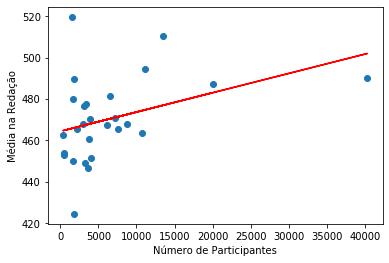

In [79]:
x = base_municipio.Participantes.count()
y = np.array(base_municipio.Media_Redacao.mean())
plt.scatter(x,y)
plt.xlabel("Número de Participantes")
plt.ylabel("Média na Redação")
b = regressaoLinear(np.array(x),y)
yp = resolveLin(b,x)
plt.plot(x,yp,'r')
print('R2 = '+str(round(r2(y,yp)*100,2))+'%')

R2 = 55.97%


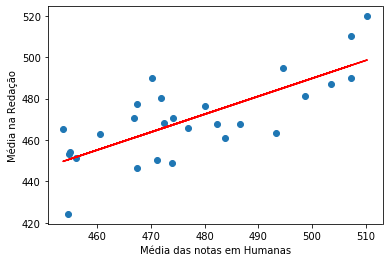

In [82]:
x = base_municipio.Media_Humanas.mean()
y = np.array(base_municipio.Media_Redacao.mean())
plt.scatter(x,y)
plt.xlabel("Média das notas em Humanas")
plt.ylabel("Média na Redação")
b = regressaoLinear(np.array(x),y)
yp = resolveLin(b,x)
plt.plot(x,yp,'r')
print('R2 = '+str(round(r2(y,yp)*100,2))+'%')

In [90]:
base[base['UF'] == 'RJ'].mean()

Ano                    2009.997993
Dependencia_ADM                inf
Localizacao               1.026836
Matriculas              101.403286
Participantes_PCD         0.075230
Participantes            54.412504
Taxa_Participacao        68.339655
Media_Naturais          553.925755
Media_Humanas           507.198529
Media_Linguagens        530.897080
Media_Matematica        535.568101
Media_Redacao           510.426478
Media_ProvaObjetiva      42.825637
Media_Total              48.377443
IAFD                     67.244170
Taxa_Permanencia         73.100547
Taxa_Aprovacao           80.056998
Taxa_Reprovacao          13.126894
Taxa_Abandono             6.816107
dtype: float64

In [105]:
rj.Media_Humanas

4482    454.19
4483       NaN
4484    434.99
4485    443.44
4486       NaN
4487    394.09
4488    448.33
4489    432.30
4490    429.39
4491       NaN
4492       NaN
4493       NaN
4494    427.57
4495    493.19
4496    449.19
4497    468.90
4498    480.25
4499       NaN
4500       NaN
4501       NaN
4502       NaN
4503    468.13
4504    463.98
4505    431.59
4506    472.01
4507    488.88
4508    462.95
4509    453.59
4510       NaN
4511       NaN
         ...  
4820    416.95
4821    417.31
4822    446.11
4823    471.75
4824       NaN
4825       NaN
4826       NaN
4827       NaN
4828    488.19
4829       NaN
4830       NaN
4831       NaN
4832       NaN
4833    493.67
4834    499.13
4835    455.27
4836    463.41
4837    454.22
4838    491.82
4839    508.89
4840       NaN
4841       NaN
4842    520.29
4843    512.39
4844    478.97
4845    499.76
4846    502.42
4847    504.93
4848    527.49
4849    459.09
Name: Media_Humanas, Length: 368, dtype: float64

In [107]:
rj.dropna(subset=['Media_Humanas','Media_Redacao'],how='any').Media_Humanas

4482    454.19
4484    434.99
4485    443.44
4487    394.09
4488    448.33
4489    432.30
4490    429.39
4494    427.57
4495    493.19
4496    449.19
4497    468.90
4498    480.25
4503    468.13
4504    463.98
4505    431.59
4506    472.01
4507    488.88
4508    462.95
4509    453.59
4512    474.43
4515    447.70
4516    446.92
4517    460.68
4518    450.32
4519    444.31
4520    466.42
4521    462.04
4524    459.46
4525    447.74
4526    434.76
         ...  
4805    468.63
4806    426.85
4807    445.21
4808    438.91
4812    456.10
4813    427.48
4814    460.23
4816    433.64
4817    445.14
4818    419.43
4819    427.70
4821    417.31
4822    446.11
4823    471.75
4828    488.19
4833    493.67
4834    499.13
4835    455.27
4836    463.41
4837    454.22
4838    491.82
4839    508.89
4842    520.29
4843    512.39
4844    478.97
4845    499.76
4846    502.42
4847    504.93
4848    527.49
4849    459.09
Name: Media_Humanas, Length: 234, dtype: float64

R2 = 36.43%


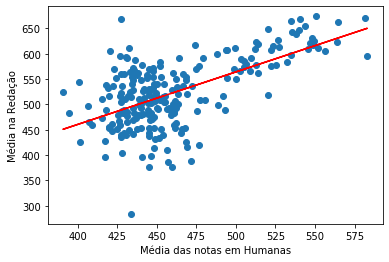

In [108]:
rj = base[base['UF'] == 'RR'].dropna(subset=['Media_Humanas','Media_Redacao'],how='any')
x = rj.Media_Humanas
y = np.array(rj.Media_Redacao)
plt.scatter(x,y)
plt.xlabel("Média das notas em Humanas")
plt.ylabel("Média na Redação")
b = regressaoLinear(np.array(x),y)
yp = resolveLin(b,x)
plt.plot(x,yp,'r')
print('R2 = '+str(round(r2(y,yp)*100,2))+'%')